In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep,numpy as np
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

In [9]:
df_Sr = pd.read_pickle("Nov18SourceB2B.pkl")
df_Cosmic= pd.read_pickle("../jinstData/Sept2CosmicUpdated.pkl")

In [10]:
df_Cosmic.eval('ch3_P2P_smooth_PE = (1/6.344) *ch3_P2P_smooth', inplace=True)
df_Cosmic.eval('ch4_P2P_smooth_PE = (1/6.327) *ch4_P2P_smooth', inplace=True)

In [85]:
df_Sr.eval('ch1_P2P_smooth_PE = (1/6.327) *ch1_P2P_smooth', inplace=True)
df_Sr.eval('ch2_P2P_smooth_PE = (1/6.344) *ch2_P2P_smooth', inplace=True)
df_Sr.eval('ch3_P2P_smooth_PE = (1/1.452) *ch3_P2P_smooth', inplace=True)

In [13]:
def Landau(x, normalization,location,stdev):
    #print(type(x))
    u=(x-location)*3.591/stdev/2.355
    renormalization = 1.64872*normalization
    return renormalization * np.exp(-u/2 - np.exp(-u)/2)

chi2= 18.284089223041963 ndof= 13 pval= 0.14702761805236766


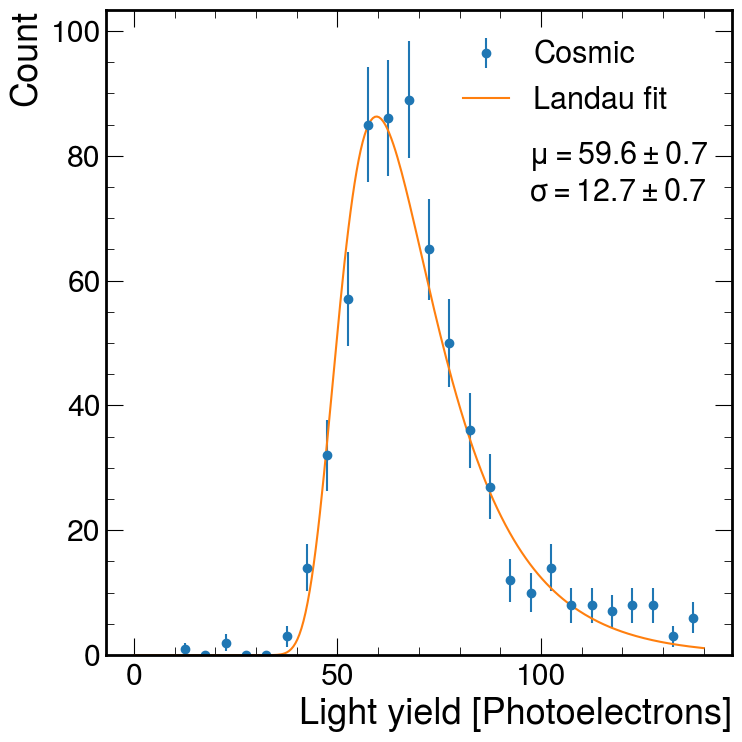

In [319]:
plt.figure(figsize=(8,8))
hist,x=np.histogram(df_Cosmic.ch3_P2P_smooth_PE, bins=26, range=(10, 140))
bin_centers=(x[1:]+x[:-1])/2

from scipy.optimize import curve_fit
start,stop=4,-6
p0=[1000, 60, 10]

dhist=np.sqrt(hist[start:stop])+(hist[start:stop]==0)
coeff, var_matrix = curve_fit(Landau, bin_centers[start:stop], hist[start:stop], p0=p0,
                             sigma=dhist)
from scipy.stats import chi2
chi2val = sum((Landau(bin_centers[start:stop], *coeff)-hist[start:stop])**2/dhist**2)
ndof = len(bin_centers[start:stop])-len(coeff)
print("chi2=",chi2val, "ndof=",ndof, "pval=", chi2.sf(chi2val, ndof))

eb = plt.errorbar(bin_centers,hist, np.sqrt(hist), linestyle='',marker='o', label='Cosmic')
x=np.linspace(0, 140, 280)
curve = plt.plot(x, Landau(x,*coeff), label="Landau fit    ")
plt.xlabel("Light yield [Photoelectrons]")
plt.ylabel("Count")
plt.ylim(0)
plt.legend(handles=[eb, curve[0]], fontsize=22)
plt.text(0.675, 0.705, f"$\\mu={coeff[1]:.1f}\\pm{np.sqrt(var_matrix[1][1]):.1f}$\n$\\sigma={coeff[2]:.1f}\\pm{np.sqrt(var_matrix[2][2]):.1f}$",
        transform=plt.gca().transAxes, fontsize=22)
plt.tight_layout()
plt.savefig("Sept2CosmicLightYieldChannel3.pdf")

chi2= 17.816338905185084 ndof= 13 pval= 0.16461829552720134


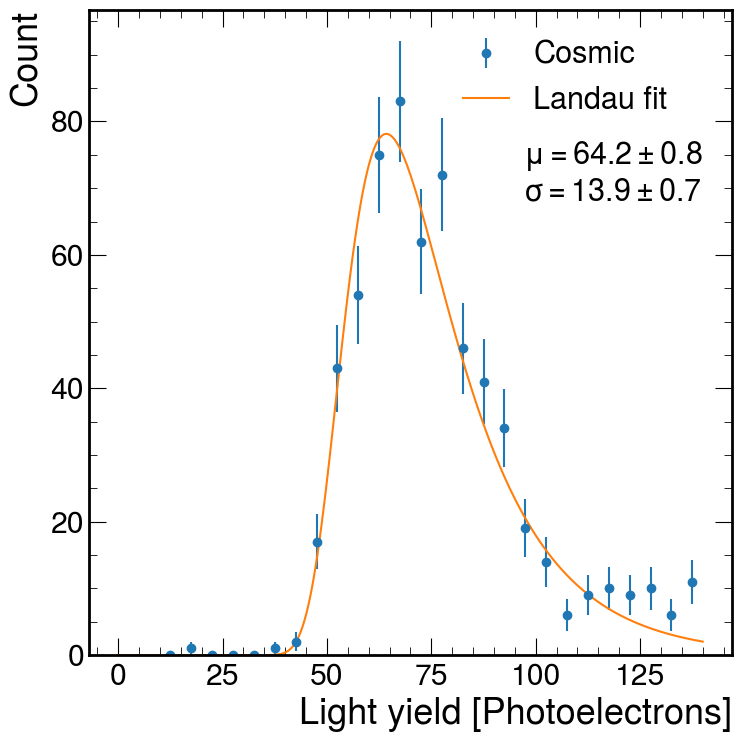

In [320]:
plt.figure(figsize=(8,8))

hist,x=np.histogram(df_Cosmic.ch4_P2P_smooth_PE, 26, range=(10, 140))
bin_centers=(x[1:]+x[:-1])/2

from scipy.optimize import curve_fit
start,stop=4,-6
p0=[1000, 60, 10]

dhist=np.sqrt(hist[start:stop])+(hist[start:stop]==0)
coeff, var_matrix = curve_fit(Landau, bin_centers[start:stop], hist[start:stop], p0=p0,
                             sigma=dhist)
from scipy.stats import chi2
chi2val = sum((Landau(bin_centers[start:stop], *coeff)-hist[start:stop])**2/dhist**2)
ndof = len(bin_centers[start:stop])-len(coeff)
print("chi2=",chi2val, "ndof=",ndof, "pval=", chi2.sf(chi2val, ndof))

eb = plt.errorbar(bin_centers,hist, np.sqrt(hist), linestyle='',marker='o', label='Cosmic')
x=np.linspace(0, 140, 280)
curve = plt.plot(x, Landau(x,*coeff), label="Landau fit    ")
plt.xlabel("Light yield [Photoelectrons]")
plt.ylabel("Count")
plt.legend(handles=[eb, curve[0]], fontsize=22)
plt.text(0.675, 0.705, f"$\\mu={coeff[1]:.1f}\\pm{np.sqrt(var_matrix[1][1]):.1f}$\n$\\sigma={coeff[2]:.1f}\\pm{np.sqrt(var_matrix[2][2]):.1f}$",
        transform=plt.gca().transAxes, fontsize=22)
plt.ylim(0)
plt.tight_layout()
plt.savefig("Sept2CosmicLightYieldChannel4.pdf")

chi2= 15.713902600624928 ndof= 18 pval= 0.6125064272866163


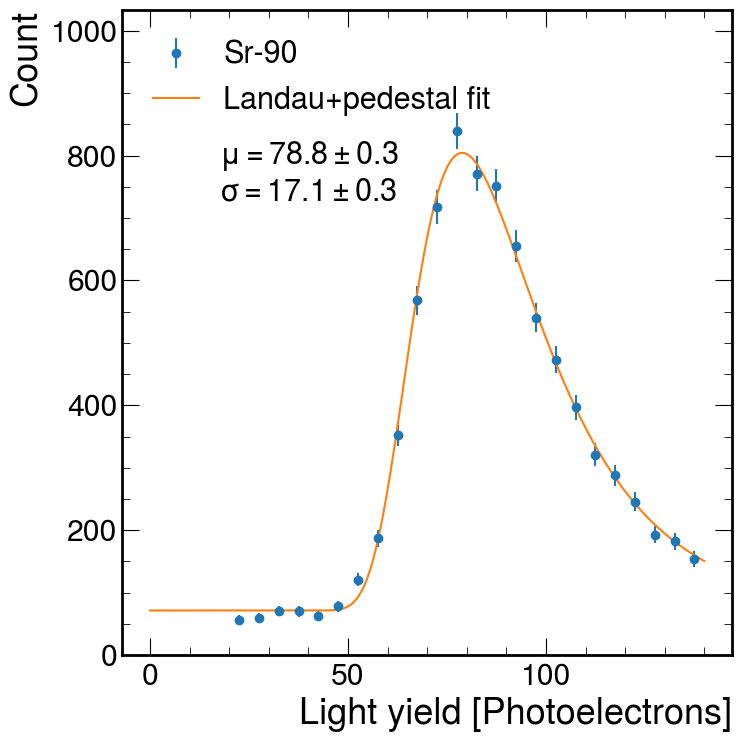

In [321]:
plt.figure(figsize=(8,8))
def LandauPlusPedestal(x, normalization,location,stdev, ped):
    #print(type(x))
    u=(x-location)*3.591/stdev/2.355
    renormalization = 1.64872*normalization
    return renormalization * (np.exp(-u/2 - np.exp(-u)/2)+ped)

q="ch3_P2P_smooth_PE>120 and ch3_P2P_smooth_PE<400 and ch1_P2P_smooth_PE>0"
hist,x=np.histogram(df_Sr.query(q).ch2_P2P_smooth_PE, bins=24, range=(20, 140))
bin_centers=(x[1:]+x[:-1])/2

from scipy.optimize import curve_fit
start,stop=2,None
p0=[1000, 85, 20,.1]

fnc=LandauPlusPedestal

dhist=np.sqrt(hist[start:stop])+(hist[start:stop]==0)
coeff, var_matrix = curve_fit(fnc, bin_centers[start:stop], hist[start:stop], p0=p0,
                             sigma=dhist)
from scipy.stats import chi2
chi2val = sum((fnc(bin_centers[start:stop], *coeff)-hist[start:stop])**2/dhist**2)
ndof = len(bin_centers[start:stop])-len(coeff)
print("chi2=",chi2val, "ndof=",ndof, "pval=", chi2.sf(chi2val, ndof))

eb = plt.errorbar(bin_centers,hist, np.sqrt(hist), linestyle='',marker='o', label='Sr-90')
x=np.linspace(0, 140, 280)
curve = plt.plot(x, fnc(x,*coeff), label="Landau+pedestal fit")
plt.xlabel("Light yield [Photoelectrons]")
plt.ylabel("Count")
plt.legend(handles=[eb, curve[0]], fontsize=22, loc='upper left')
plt.ylim(0, max(hist*1.23))
plt.text(0.158, 0.705, f"$\\mu={coeff[1]:.1f}\\pm{np.sqrt(var_matrix[1][1]):.1f}$\n$\\sigma={coeff[2]:.1f}\\pm{np.sqrt(var_matrix[2][2]):.1f}$",
        transform=plt.gca().transAxes, fontsize=22)
plt.tight_layout()

plt.savefig("Nov18Sr90LightYieldChannel2.pdf")

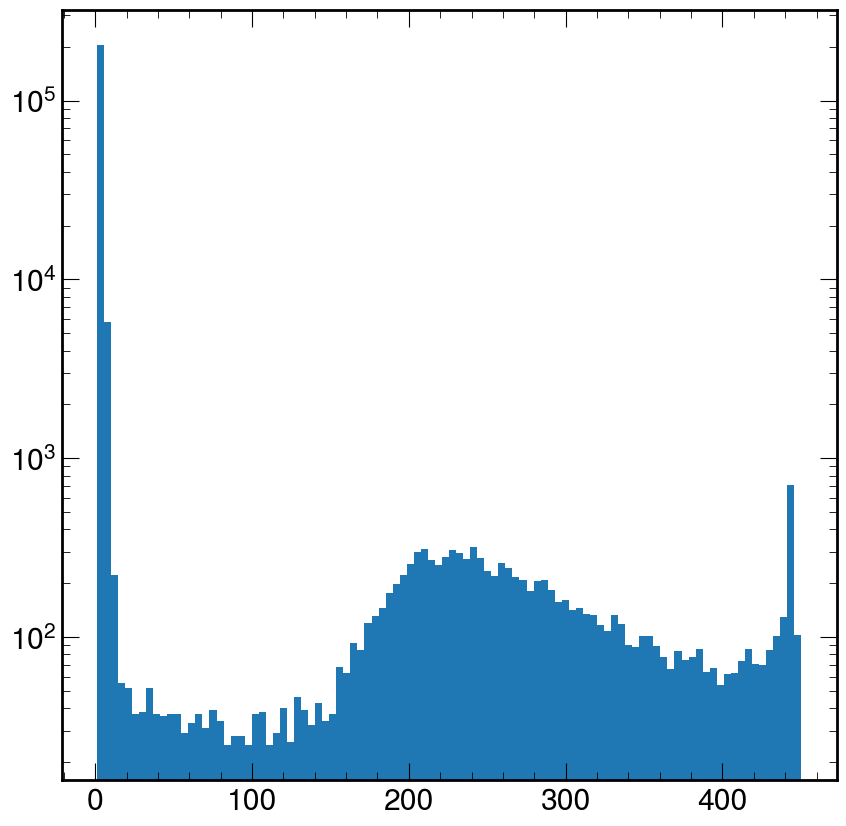

In [322]:
plt.hist(df_Sr.ch3_P2P_smooth_PE,bins=100)
plt.yscale('log')

In [270]:
def eOverMip(beta, I=0.000063):
    me=0.511
    
    gamma = 1/np.sqrt(1-beta**2)
    num= 0.5/beta**2*(np.log(me**2*beta**2*gamma**2*(gamma-1)/(2*I**2))+(1-beta**2)\
                        -(2*gamma-1)/gamma**2*np.log(2)+1/8*((gamma-1)/gamma)**2)
    gammaMIP=1
    denom = (1/2*np.log(4*me*me*gammaMIP**4/I**2)-1)
    return num/denom

1.2795943626352753
1.2829504311959277


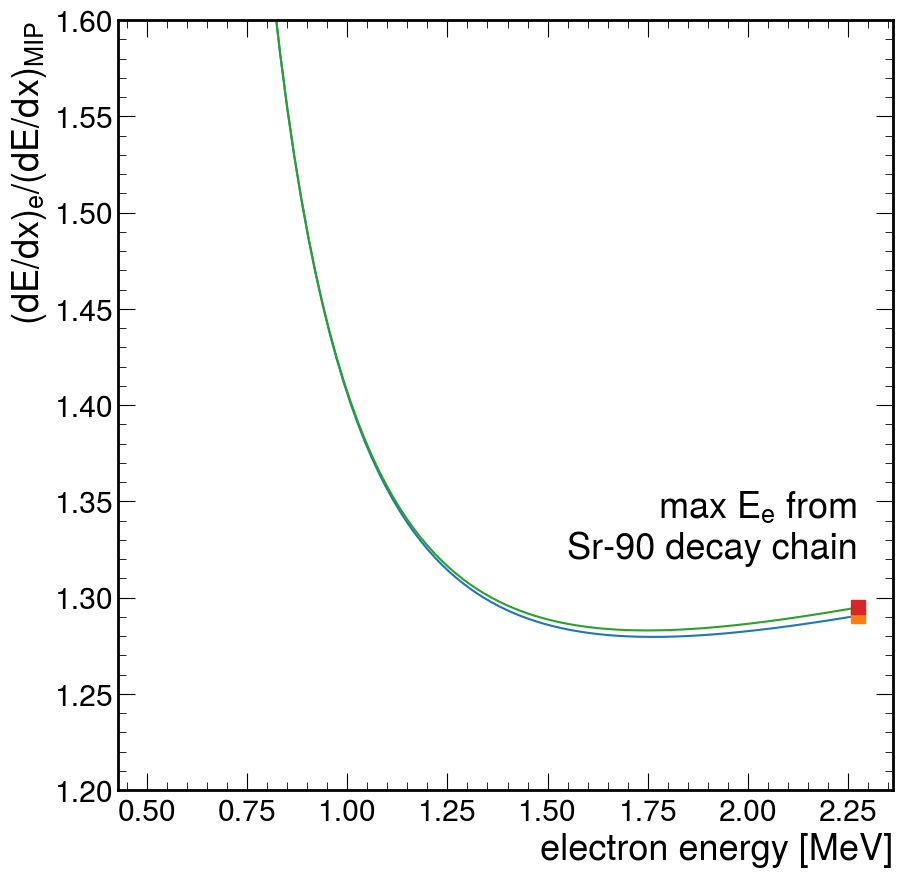

In [276]:
minE=.1
me=0.511
minE=0
max_beta = 1-(me/maxE)**2

maxE_Y = 2.274
E=np.linspace(me*1.01, maxE_Y, 101)

beta =np.sqrt(1-(me/E)**2)

rat=eOverMip(beta, 60e-6)

plt.plot(E, rat)
plt.ylim(1.2, 1.6)
plt.xlabel("electron energy [MeV]")
plt.ylabel("$(dE/dx)_e/(dE/dx)_{MIP}$")
plt.text(E[-1], rat[-1]+.03, "max $E_e$ from\nSr-90 decay chain", horizontalalignment='right')
plt.plot([E[-1]], [rat[-1]], "s", markersize=10)
print(min(rat))

rat=eOverMip(beta, 70e-6)

plt.plot(E, rat)
plt.plot([E[-1]], [rat[-1]], "s", markersize=10)
print(min(rat))
#plt.yscale('log')

In [236]:
print(78.9/1.28)

61.640625


chi2= 7.162139502718263 ndof= 9 pval= 0.620242700340427
chi2= 6.643842893767441 ndof= 9 pval= 0.6741450169734774
ch3 60.6 +-0.7
ch4 65.8 +-0.9
diff[%] = 8.2


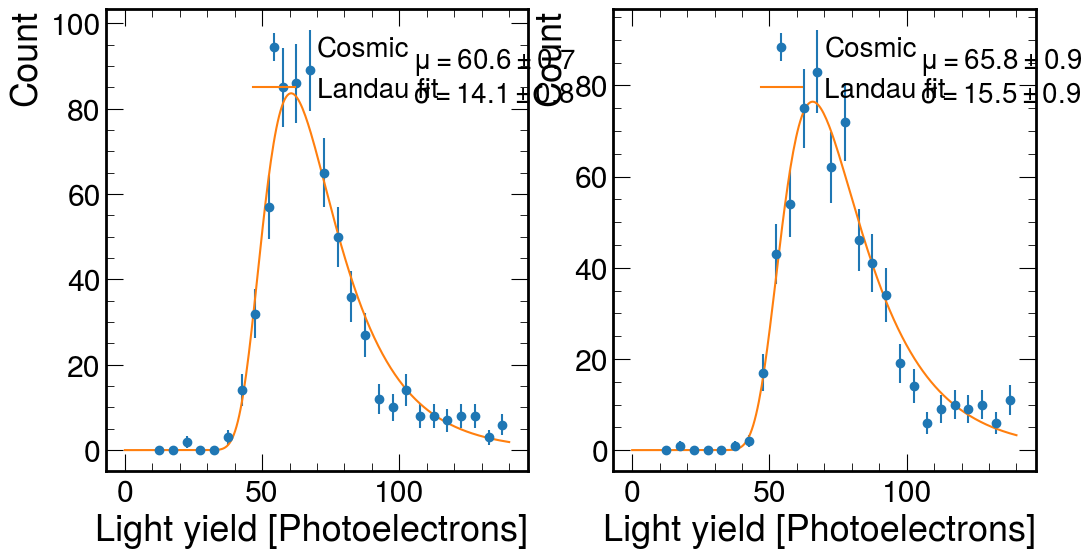

In [263]:
def LandauPlusPedestal(x, normalization,location,stdev, ped):
    #print(type(x))
    u=(x-location)*3.591/stdev/2.355
    renormalization = 1.64872*normalization
    return renormalization * (np.exp(-u/2 - np.exp(-u)/2)+ped)

mus={}
dmus={}

fig, axs = plt.subplots(1,2, figsize=(12,6))
for ch in 3, 4:
    plt.sca(axs[ch-3])
    q="abs(ch1_time_smooth-ch2_time_smooth)<2.5"
    hist,x=np.histogram(df_Cosmic.query(q)[f"ch{ch}_P2P_smooth_PE"], 26, range=(10, 140))
    bin_centers=(x[1:]+x[:-1])/2

    from scipy.optimize import curve_fit
    start,stop=4,-10
    p0=[1000, 60, 10]
    fnc=Landau#PlusPedestal
    
    dhist=np.sqrt(hist[start:stop])+(hist[start:stop]==0)
    coeff, var_matrix = curve_fit(fnc, bin_centers[start:stop], hist[start:stop], p0=p0,
                                 sigma=dhist)
    from scipy.stats import chi2
    chi2val = sum((fnc(bin_centers[start:stop], *coeff)-hist[start:stop])**2/dhist**2)
    ndof = len(bin_centers[start:stop])-len(coeff)
    print("chi2=",chi2val, "ndof=",ndof, "pval=", chi2.sf(chi2val, ndof))

    eb = plt.errorbar(bin_centers,hist, np.sqrt(hist), linestyle='',marker='o', label='Cosmic')
    x=np.linspace(0, 140, 280)
    curve = plt.plot(x, fnc(x,*coeff), label="Landau fit        ")
    plt.xlabel("Light yield [Photoelectrons]")
    plt.ylabel("Count")
    plt.legend(handles=[eb, curve[0]], fontsize=20)
    plt.text(0.724, 0.8, f"$\\mu={coeff[1]:.1f}\\pm{np.sqrt(var_matrix[1][1]):.1f}$\n$\\sigma={coeff[2]:.1f}\\pm{np.sqrt(var_matrix[2][2]):.1f}$",
            transform=plt.gca().transAxes, fontsize=20)
    
    mus[ch]=coeff[1]
    dmus[ch]=np.sqrt(var_matrix[1][1])
print("ch3", "%.1f +-%.1f"%(mus[3], dmus[3]))
print("ch4", "%.1f +-%.1f"%(mus[4], dmus[4]))
print("diff[%] =", "%.1f"%(100*abs(mus[3]-mus[4])*2/(mus[3]+mus[4])))
plt.show()